# What are Outliers? 🤔

An Outlier is an observation in a given dataset that lies "far" from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.

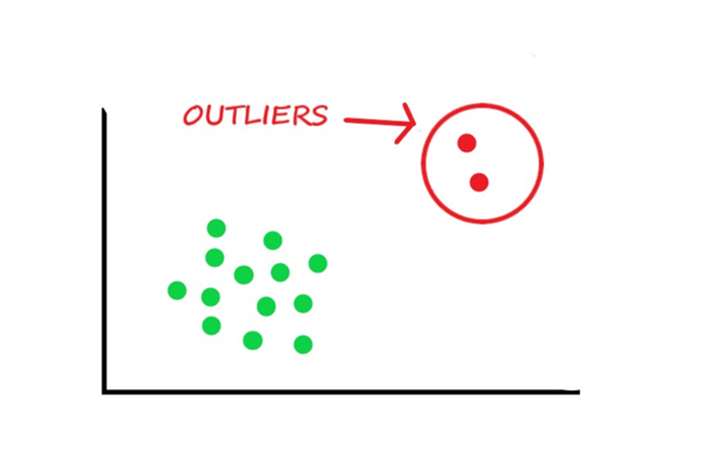

### Why Do they Occur?
An outlier may occur due to the variability in the data, or due to experimental error/human error.

They may indicate an experimental error or heavy skewness in the data(heavy-tailed distribution).

### What Do They Affect?

In statistics, we have three measures of central tendency namely Mean, Median, and Mode. They help us describe the data.


* **Mean** is the accurate measure to describe the data when we do not have any outliers present.
* **Mean’** is the only measure of central tendency that is affected by the outliers which in turn impacts Standard deviation.
* **Median** is used if there is an outlier in the dataset.
* **Mode** is used if there is an outlier AND about ½ or more of the data is the same.

### Detecting Outliers

If our dataset is small, we can detect the outlier by just looking at the dataset. But what if we have a huge dataset, how do we identify the outliers then? We need to use visualization and mathematical techniques.

Below are some of the techniques of detecting outliers

* Boxplots
* Z-score
* Inter Quantile Range(IQR)


### How to Handle Outliers?

Below are some of the methods of treating the outliers:

#### Method 1: Trimming/Remove the outliers

In this technique, we remove the outliers from the dataset. Although it is not a good practice to follow.


#### Method 2: Quantile Based Flooring and Capping

In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value. Python code to delete the outlier and copy the rest of the elements to another array.


#### Method 3: Mean/Median Imputation

As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.




In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
data = pd.read_csv("scores.csv")
data.shape

(80, 3)

In [151]:
data.sample(5)

,Emotional_Quotient,Intelligence_Quotient,Marks
21,70,215,75
19,72,130,77
3,75,129,78
9,64,130,76
13,73,151,74


In [152]:
data.describe()

,Emotional_Quotient,Intelligence_Quotient,Marks
count,80.000000,80.000000,80.000000
mean,73.125000,145.262500,76.062500
std,6.672018,21.560479,9.195959
min,50.000000,120.000000,45.000000
25%,68.000000,130.000000,72.000000
50%,73.000000,135.000000,76.000000
75%,78.000000,160.250000,81.250000
max,92.000000,215.000000,100.000000


### Distribution plot of all three columns

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

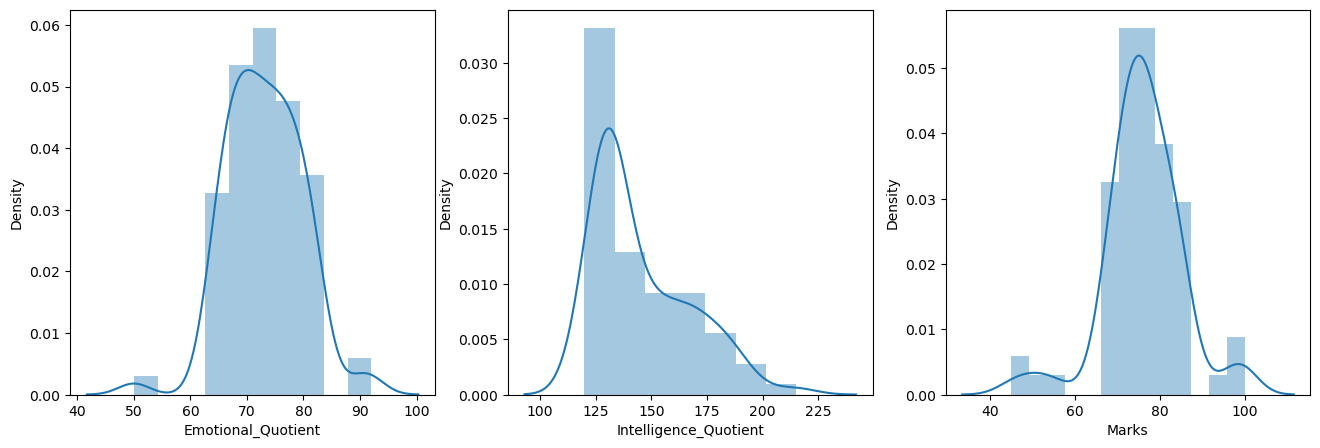

In [153]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(data['Emotional_Quotient'])

plt.subplot(1,3,2)
sns.distplot(data['Intelligence_Quotient'])

plt.subplot(1,3,3)
sns.distplot(data['Marks'])

plt.show()

## 1. Detecting Outliers using the Z-scores

Criteria: Data should be normal or almost normally distributed. Any data point whose Z-score falls out of 3rd standard deviation is an outlier.

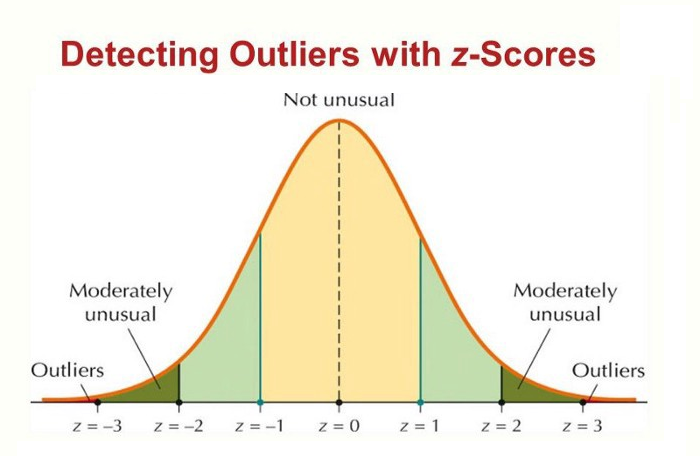

In [154]:
z_score_upper_limit = data['Emotional_Quotient'].mean() + 3*data['Emotional_Quotient'].std()
z_score_lower_limit = data['Emotional_Quotient'].mean() - 3*data['Emotional_Quotient'].std()

In [155]:
z_score_upper_limit

93.14105368356338

In [156]:
z_score_lower_limit

53.108946316436615

### Capping

In this technique called “outlier detection,” we cap our data to set limits. 

In [157]:
data["Emotional_Quotient"] = np.where(
    data["Emotional_Quotient"] > z_score_upper_limit,
    z_score_upper_limit, 
    np.where(
        data["Emotional_Quotient"] < z_score_lower_limit,
        z_score_lower_limit,
        data["Emotional_Quotient"]
    )
)

In [158]:
data.describe()

,Emotional_Quotient,Intelligence_Quotient,Marks
count,80.000000,80.000000,80.000000
mean,73.163862,145.262500,76.062500
std,6.543434,21.560479,9.195959
min,53.108946,120.000000,45.000000
25%,68.000000,130.000000,72.000000
50%,73.000000,135.000000,76.000000
75%,78.000000,160.250000,81.250000
max,92.000000,215.000000,100.000000


c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotional_Quotient'>

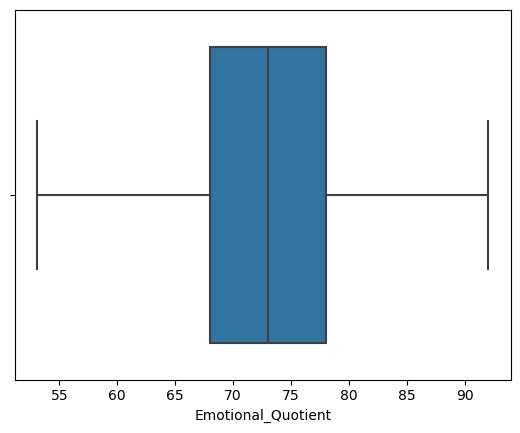

In [159]:
sns.boxplot(data["Emotional_Quotient"])

## 2. Detecting Outliers using the Inter Quantile Range(IQR)

Criteria: If data is skewed or not normally distributed then data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.

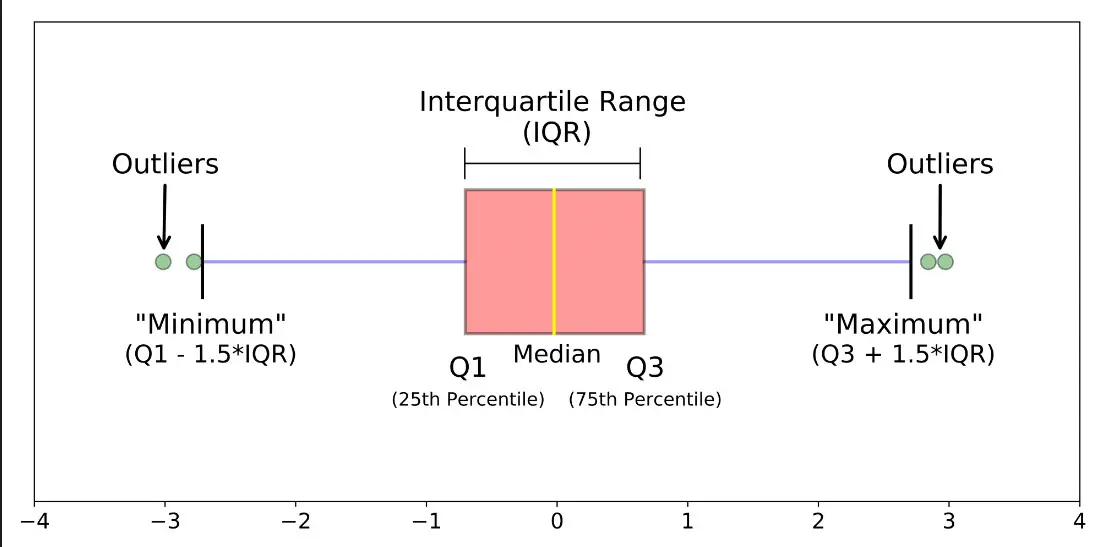

In statistics, interquartile range or IQR is a quantity that measures the difference between the first and the third quartiles in a given dataset.

* The first quartile is also called the one-fourth quartile, or the `25% quartile`.
* If q25 is the first quartile, it means 25% of the points in the dataset have values less than q25.
* The third quartile is also called the three-fourth, or the `75% quartile`.
* If q75 is the three-fourth quartile, 75% of the points have values less than q75.
* Using the above notations, `IQR = q75 - q25`.

In [160]:
data["Intelligence_Quotient"].skew()

1.0638929876178798

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Intelligence_Quotient'>

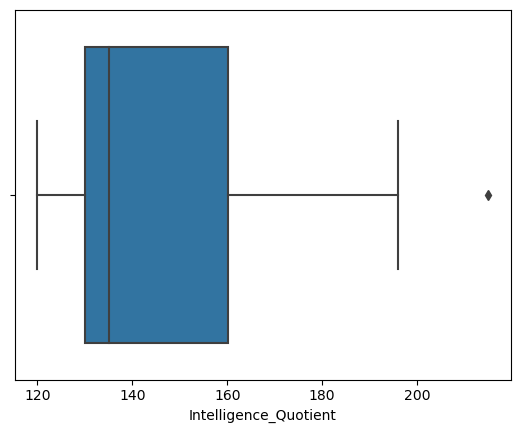

In [162]:
sns.boxplot(data['Intelligence_Quotient'])

In [163]:
# Finding the IQR
percentile25 = data['Intelligence_Quotient'].quantile(0.25)
percentile75 = data['Intelligence_Quotient'].quantile(0.75)

In [164]:
percentile25

130.0

In [165]:
percentile75

160.25

In [166]:
iqr = percentile75 - percentile25
iqr

30.25

In [167]:
iqr_upper_limit = percentile75 + 1.5 * iqr
iqr_lower_limit = percentile25 - 1.5 * iqr


print("Upper limit", iqr_upper_limit)
print("Lower limit", iqr_lower_limit)

Upper limit 205.625
Lower limit 84.625


In [168]:
data[data['Intelligence_Quotient'] > iqr_upper_limit] 


,Emotional_Quotient,Intelligence_Quotient,Marks
21,70.0,215,75


In [169]:
data[data['Intelligence_Quotient'] < iqr_lower_limit]

,Emotional_Quotient,Intelligence_Quotient,Marks


In [170]:
data["Intelligence_Quotient"] = np.where(
    data["Intelligence_Quotient"] > iqr_upper_limit,
    iqr_upper_limit, 
    np.where(
        data["Intelligence_Quotient"] < iqr_lower_limit,
        iqr_lower_limit,
        data["Intelligence_Quotient"]
    )
)

In [171]:
data.describe()

,Emotional_Quotient,Intelligence_Quotient,Marks
count,80.000000,80.000000,80.000000
mean,73.163862,145.145312,76.062500
std,6.543434,21.199087,9.195959
min,53.108946,120.000000,45.000000
25%,68.000000,130.000000,72.000000
50%,73.000000,135.000000,76.000000
75%,78.000000,160.250000,81.250000
max,92.000000,205.625000,100.000000


c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Intelligence_Quotient'>

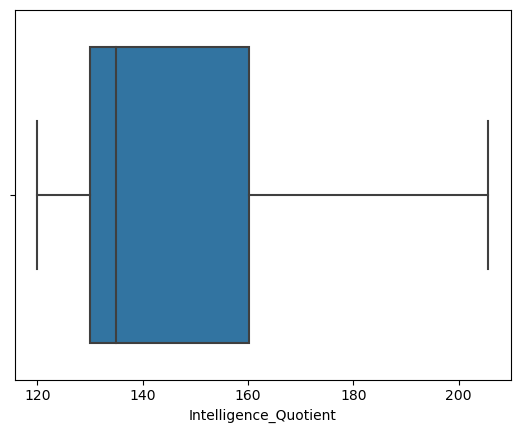

In [172]:
sns.boxplot(data['Intelligence_Quotient'])


## 3. Detecting Outliers Using Percentile

Defining a `custom range` that accommodates all data points that lie anywhere between 0.5 and 99.5 percentile of the dataset. 

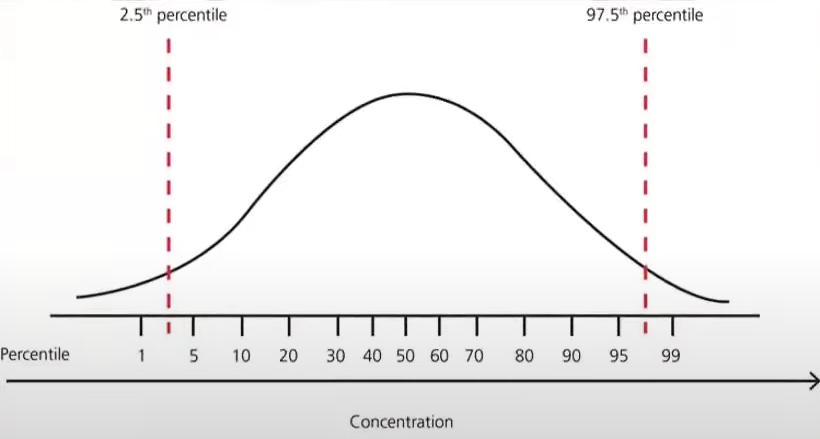

To do this, set q = [0.10, 90.0] in the percentile function.

c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marks'>

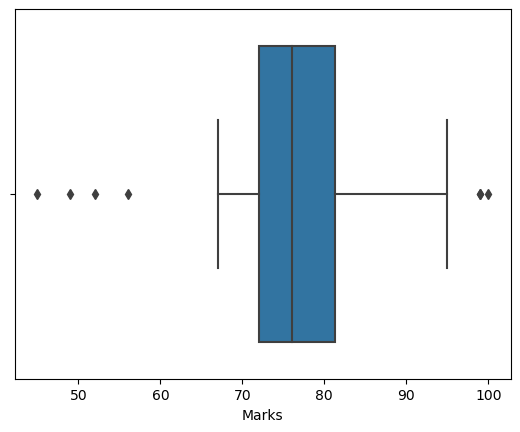

In [173]:
sns.boxplot(data['Marks'])


### What is winsorization in outliers?

Winsorization is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data.

In [174]:

upper_limit = data['Marks'].quantile(0.90)
upper_limit

85.0

In [175]:
lower_limit = data['Marks'].quantile(0.10)
lower_limit

68.0

In [176]:
data = data[(data['Marks'] <= upper_limit) & (data['Marks'] >= lower_limit)]


c:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marks'>

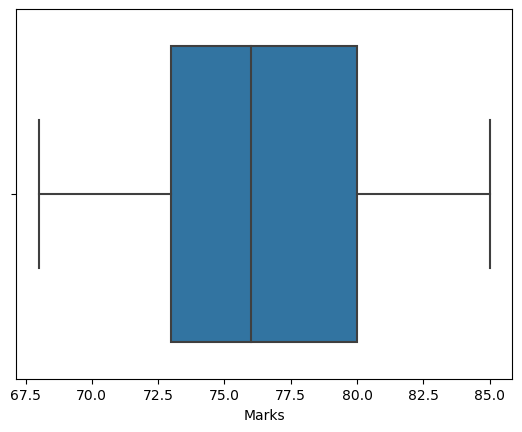

In [177]:
sns.boxplot(data["Marks"])

In [180]:
data.head()

,Emotional_Quotient,Intelligence_Quotient,Marks
0,72.0,120.0,75
2,68.0,169.0,70
3,75.0,129.0,78
4,80.0,180.0,82
5,64.0,125.0,68


##### *Note: GitHub repo to check out the Jupyter notebook*

Frequently Asked Questions

Q1. How should you handle outliers?

A. In conclusion, identifying and addressing outliers is really important in data analysis. These data anomalies can skew results, leading to inaccurate insights and decisions. 

By employing robust detection techniques to handle outliers effectively, through visualization or statistical methods, to enhance the integrity of analyses and unlock hidden patterns within our data. 

Apply appropriate techniques like trimming or capping to mitigate their influence, and contribute to more informed and reliable decision-making processes.

